<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Linear Algebra

Numerical methods for linear algebra problems lies at the heart of many numerical approaches and is something we will spend some time on.  Roughly we can break down probablems that we would like to solve into two general problems, solving a system of equations

$$A x = b$$

and solving the eigenvalue problem

$$A v = \lambda v.$$

We will take each in turn, evaluate some of the fundamental properties and methods for solving these problems, and gain some understanding of when they fail.



## General Problem Specification

Before we dive in lets consider some of the pivotal problems that numerical methods for linear algebra tries to address.  

For this discussion we will be using the common notation $m \times n$ to denote the dimensions of a matrix $A$.  The $m$ refers to the number of rows and $n$ the number of columns.  If a matrix is square, i.e. $m = n$, then we will use the notation that $A$ is $m \times m$.

### Systems of Equations

We have $m$ equations for $m$ unknowns.

$$A x = b$$

#### Example: Vandermonde Matrix

We have data $(x_i, y_i), ~~ i = 1, 2, \ldots, m$ that we want to fit a polynomial of order $m-1$.  Sovling the linear system $A p = y$ does this for us where

$$A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{m-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{m-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{m-1}
\end{bmatrix} ~~~~~ y = \begin{bmatrix}
y_1 \\ y_0 \\ \vdots \\ y_m
\end{bmatrix}$$

and $p$ are the coefficients of the interpolating polynomial $\mathcal{P}_N(x) = p_0 + p_1 x + p_2 x^2 + \cdots + p_m x^{m-1}$.

#### Example: Linear least squares 1

In a similar case as above, say we want to fit a paritcular function (could be a polynomial) to a given number of data points except in this case we have more data points than free parameters.  In the case of polynomials this could be the same as saying we have $m$ data points but only want to fit a $n$th order polynomial through the data where $n \leq m - 1$.  One of the common approaches to this problem is to minimize the "least-squares" error between the data and the resulting function:

$$E = \left( \sum^m_{i=1} |y_i - f(x_i)|^2 \right )^{1/2}.$$

But how do we do this if our matrix $A$ is now $m \times n$ and looks like

$$A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{n}
\end{bmatrix}?$$

Turns out if we solve the system

$$A^T A x = A^T b$$

we can gaurantee that the error is minimized in the least-squares sense.

#### Example:  Linear least squares 2

Try and fit a line through the data points

[(1.87498549,  1.31037444,  1.23798973,  1.96912525,  1.7150103 ,
        2.07664549,  1.53174786,  1.96478464,  2.31023704,  1.59167973]

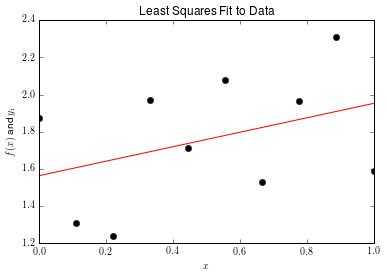

In [12]:
# Linear Least Squares Problem

x = numpy.array([        0.0, 0.11111111, 0.22222222, 0.33333333, 0.44444444, 
                  0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.0])
y = numpy.array([ 1.87498549,  1.31037444,  1.23798973,  1.96912525,  1.7150103 ,
                  2.07664549,  1.53174786,  1.96478464,  2.31023704,  1.59167973])

A = numpy.ones((x.shape[0], 2))
A[:, 1] = x
p = numpy.linalg.lstsq(A, y)[0]

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, p[0] + p[1] * x, 'r')
axes.set_title("Least Squares Fit to Data")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")

plt.show()

### Eigenproblems

Eigenproblems come up in a variety of contexts and often are integral to many problem of scientific and engineering interest.  As a review, if $A \in \mathbb{C}^{m\times m}$ (a square matrix with complex values), a non-zero vector $v\in\mathbb{C}^m$ is an **eigenvector** of $A$ with a corresponding **eigenvalue** $\lambda \in \mathbb{C}$ if 

$$A v = \lambda v.$$

One way to interpret the eigenproblem is that we are attempting to ascertain the "action" of the matrix $A$ on some subspace of $\mathbb{C}^m$ where this action acts like scalar multiplication.  This subspace is called an **eigenspace**.

#### Example

Compute the eigenspace of the matrix

$$A = \begin{bmatrix}
    1 & 2 \\
    2 & 1
\end{bmatrix}$$

Recall that we can find the eigenvalues of a matrix by computing $\det(A - \lambda I) = 0$.  In this case we have

$$\begin{aligned}
    A - \lambda I &= \begin{bmatrix}
        1 & 2 \\
        2 & 1
    \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \\
    &= \begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix}
\end{aligned}$$

whose determinant is

$$\begin{aligned}
\begin{vmatrix}
    1 - \lambda & 2 \\
    2 & 1 - \lambda
\end{vmatrix} &= (1 - \lambda) (1 - \lambda) - 2 \cdot 2 \\
&= 1 - 2 \lambda + \lambda^2 - 4 \\
&= \lambda^2 - 2 \lambda - 3.
\end{aligned}$$

Setting this equal to zero we can find the eigenvalues as

$$\begin{aligned}
\lambda &= \frac{2 \pm \sqrt{4 - 4 \cdot 1 \cdot (-3)}}{2} \\
&= 1 \pm 2 \\
&= [-1, 3]
\end{aligned}$$

The eigenvectors then can be found by rearranging the equation to $(A - \lambda I) v = 0$ and solving for each vector.  A trick that works most of the time is to normalize each vector such that the first entry is 1 ($v_1 = 1):

$$\begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix} \begin{bmatrix} 1 \\ v_2 \end{bmatrix} = 0
$$

$$\begin{aligned}
    1 - \lambda + 2 v_2 &= 0 \\
    v_2 &= \frac{\lambda - 1}{2}
\end{aligned}$$

and just to make sure

$$\begin{aligned}
    2 + (1- \lambda \frac{\lambda - 1}{2} & = 0\\
    (\lambda - 1)^2 - 4 &=0
\end{aligned}$$

which by design is satisfied by our eigenvalues.  Another sometimes easier approach is to plug-in the eigenvalues to find each corresponding eigenvector.  The eigenvectors are therefore

$$v = \begin{bmatrix}1 \\ -1 \end{bmatrix}, \begin{bmatrix}1 \\ 1 \end{bmatrix}.$$

Note that these are linearly independent.


## Fundamentals

### Matrix-Vector Multiplication
### Orthogonal Vectors and Matrices
### Norms

## QR Factorizations and Least Squares

### Projections
### QR Factorization
### Gram-Schmidt Orthogonalization
### Householder Triangularization
### Least Squares Problems

## Conditioning and Stability

### Conditioning and Condition Numbers
### Stability
#### Stability of Householder Triangularization
#### Stability of Back substitution
#### Conditioning of Least Squares Problems
#### Stability of Least Squares Problems
#### Stability of Guassian Elimination
#### Cholesky Factorization

## Eigenproblems

### Overview
### Hessenberg and Tridiogonal form
### Rayleigh Quotient
### Inverse Iteration
### QR Algorithm
### Alternatives

## Iterative Methods

### Arnoldi Iteration
### GMRES
### Lanczos Iteration
### Conjugate Gradients
### Biorthogonalization Methods
### Preconditioning